<h1 style="color:Red;">Machine Learning With Python: Linear Regression With One Variable</h1>
<h2 style="color:green;">Sample problem of predicting home price in monroe, new jersey (USA)</h2>

Blow table represents current home prices in township bases on square feet area, new jersey
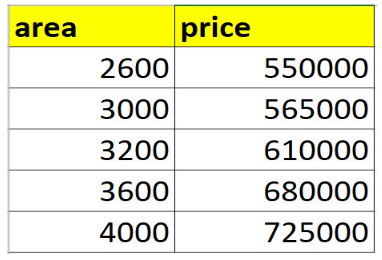

Problem Statement: Given above data build a machine learning model that can predict home prices based on square feet area

You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart.
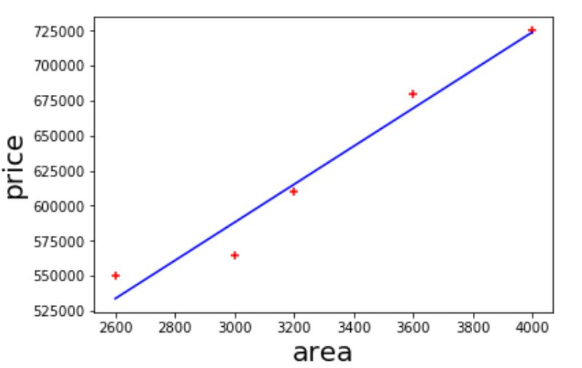
You can draw multiple lines like this bust we choose the one where total sum of error is minimum
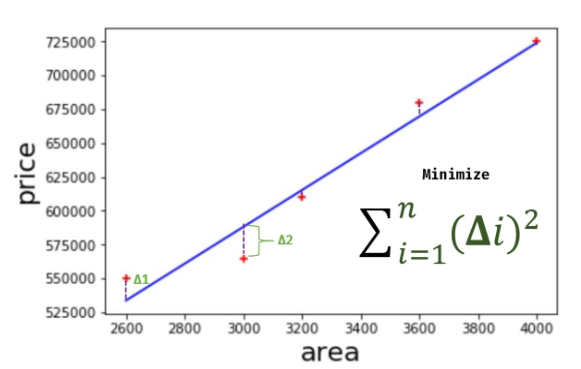

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,
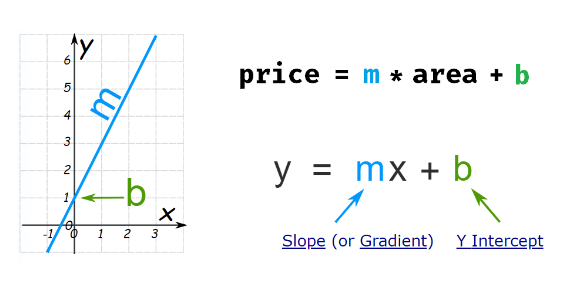

In [10]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


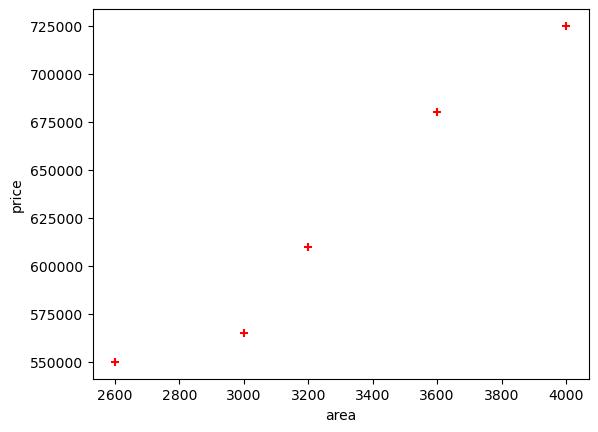

In [40]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='red', marker='+')
# plt.plot(df.area, reg.predict(df[['area']]), color='blue')

In [41]:
new_df = df.drop('price', axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [42]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [43]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df, price)

LinearRegression()

#### (1) Predict price of a home with area = 3300 sqr ft

In [44]:
reg.predict([[3300]])

C:\Users\surya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [45]:
reg.coef_

array([135.78767123])

In [46]:
reg.intercept_

180616.43835616432

#### Y = m * X + b (m is coefficient and b is intercept)

In [47]:
135.78767123 * 3300 + 180616.43835616432

628715.7534151643

### Predict price of a home with area = 5000 sqr ft

In [48]:
reg.predict([[5000]])

C:\Users\surya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

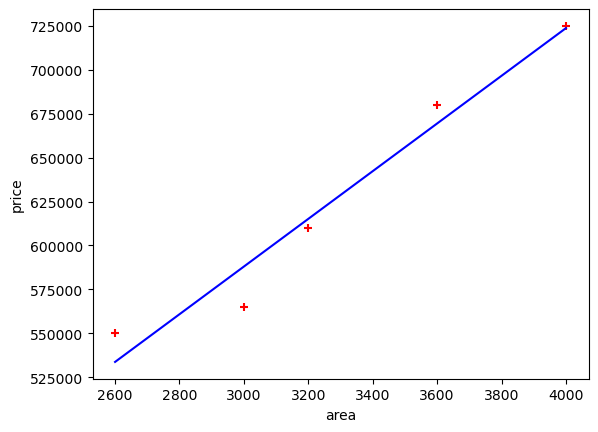

In [49]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

In [17]:
area_df = pd.read_csv("areas.csv")
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [18]:
pred = reg.predict(area_df)
pred

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [19]:
area_df['prices'] = pred
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


## Exercise

In [22]:
df = pd.read_csv('canada_per_capita_income.csv')
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


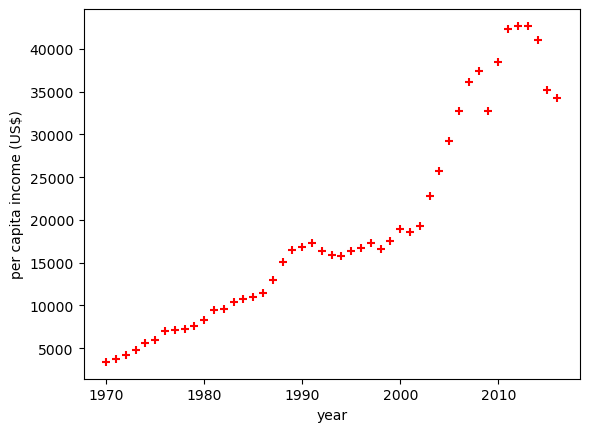

In [26]:
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(df['year'], df['per capita income (US$)'], color='red', marker='+' )

In [30]:
x_train = df.drop('per capita income (US$)', axis='columns')
x_train.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [32]:
y_train = df['per capita income (US$)']
y_train.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: per capita income (US$), dtype: float64

In [33]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [37]:
model.predict([[2020]])

C:\Users\surya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

<h1 style="color:Red;">Machine Learning With Python: Linear Regression With Mulitple Variable</h1>
<h2 style="color:green;">Sample problem of predicting home price in monroe, new jersey (USA)</h2>

Below is the table containing home prices in monroe twp, NJ. Here price depends on area (square feet), bed rooms and age of the home (in years). Given these prices we have to predict prices of new homes based on area, bed rooms and age.
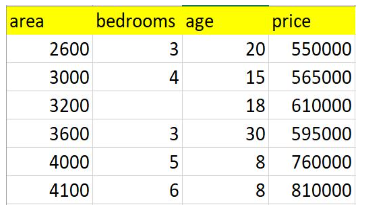


Given these home prices find out price of a home that has,
<b>3000 sqr ft area, 3 bedrooms, 40 year old</b>
<b>2500 sqr ft area, 4 bedrooms, 5 year old</b>

We will use regression with multiple variables here. Price can be calculated using following equation,
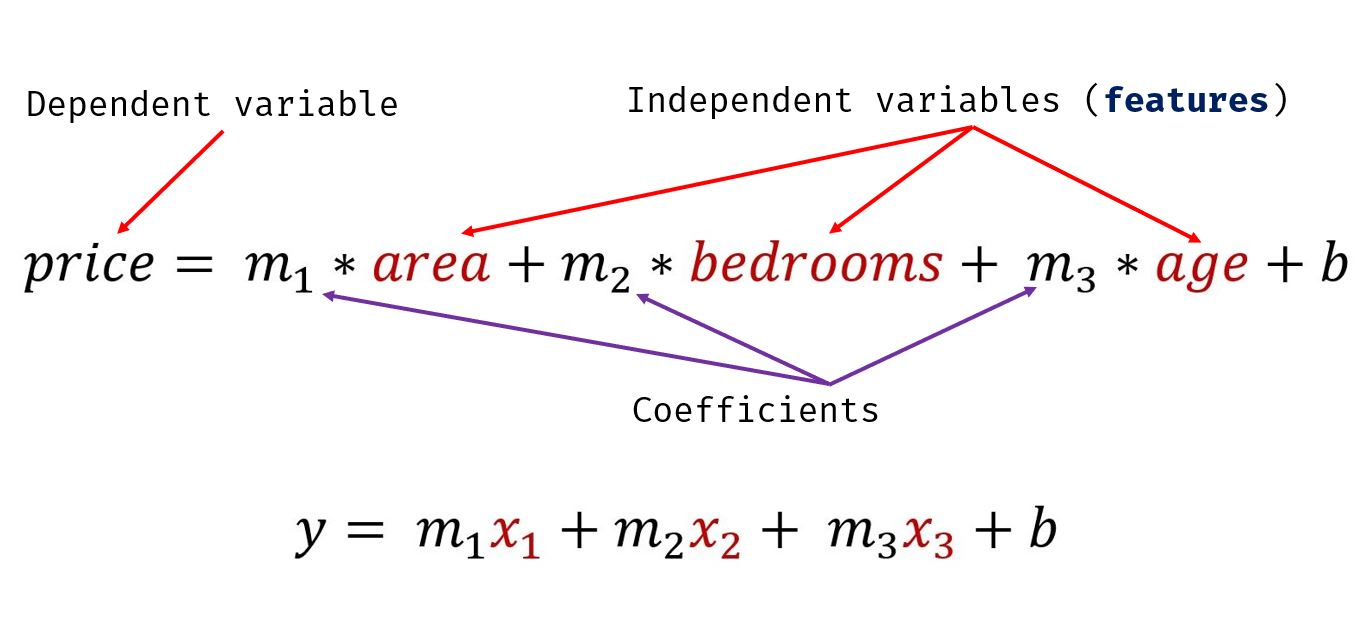

ere area, bedrooms, age are called independant variables or features whereas price is a dependant variable

In [52]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [53]:
df = pd.read_csv('homeprices_mulitple.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


#### Data Preprocessing : Fill NA values with medain value of a column

In [54]:
df.bedrooms.median()

4.0

In [55]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [56]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price', axis='columns'), df.price)

LinearRegression()

In [57]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [58]:
reg.intercept_

221323.0018654043

#### Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old

In [59]:
reg.predict([[3000, 3, 40]])

C:\Users\surya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [60]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

498408.25157402386

In [61]:
reg.predict([[2500, 4, 5]])

C:\Users\surya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

## Exercise

In [1]:
from word2number import w2n

In [14]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [15]:
df.experience = df.experience.fillna('zero')

In [16]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [17]:
df.experience = df.experience.apply(w2n.word_to_num)

In [18]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [19]:
import math
median_test_score =  math.floor(df['test_score(out of 10)'].mean())
median_test_score

7

In [20]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_test_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [21]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('salary($)', axis='columns'), df['salary($)'])

LinearRegression()

In [22]:
reg.predict([[2, 9, 6]])

C:\Users\surya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [23]:
reg.predict([[12, 10, 10]])

C:\Users\surya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])